# 3장 군집화

- 알고리즘 유형
  - 지도학습(supervised learning)
    - With Label
  - 비지도학습(unsupervised learning)
    - Without Label

## K-means

- 데이터 그룹을 구분하는 용도로 사용되는 알고리듬
- 데이터를 추절할 목표 변수나 결과 변수가 없음
  - Witout Label

## Tensor

### 자료형

|텐서플로우 자료형|파이썬 자료형|설명|
|---|---|---|
|DT_FlOAT|tf.float32|32비트 실수|
|DT_INT16|tf.int16|16비트 정수|
|DT_INT32|tf.int32|32비트 정수|
|DT_INT64|tf.int64|64비트 정수|
|DT_STRING|tf.string|문자열|
|DT_BOOL|tf.bool|불리언|

## 랭크

- 텐서를 표현하는 배열의 차원
- [[1, 2, 3], [1, 2, 3]]
  - rank: 2



- 텐서플로우의 차원 표현
  - Rank
  - Shape
  - Dimension Number

## 텐서 플로우 변환함수

- tf.shape
- tf.size
- tf.rank
- tf.reshape
- tf.sqeeze
  - 텐서프로우에서 크기가 1인 차원을 삭제
- tf.expand_dims
  - 차원 추가
- tf.slice
- tf.split
- tf.tile
  - 한텐서를 늘려 새로운 텐서를 만듦
- tf.concat
- tf.reverse
- tf.transpose
- tf.gather

### 차원 늘리기

- 2차원 배열을 3차원 배열로 변환
  - 초기 값: 2000 X 2

In [66]:
import numpy as np
import tensorflow as tf

In [67]:
vectors = []

for i in range(2000*2):
    tmp = np.random.normal(0., 1)
    vectors.append(tmp)

In [68]:
x_data = tf.reshape(vectors, [2000, 2])
expanded_x_data0 = tf.expand_dims(x_data, 0)
expanded_x_data1 = tf.expand_dims(x_data, 1)
expanded_x_data2 = tf.expand_dims(x_data, 2)

In [69]:
with tf.Session() as sess:
    x_data = sess.run(x_data)
    expanded_x_data0 = sess.run(expanded_x_data0)
    expanded_x_data1 = sess.run(expanded_x_data1)
    expanded_x_data2 = sess.run(expanded_x_data2)

    print("shape:extended0", x_data.shape, expanded_x_data0.shape)
    print("shape:extended1", x_data.shape, expanded_x_data1.shape)
    print("shape:extended2", x_data.shape, expanded_x_data2.shape)  

shape:extended0 (2000, 2) (1, 2000, 2)
shape:extended1 (2000, 2) (2000, 1, 2)
shape:extended2 (2000, 2) (2000, 2, 1)


- expand_dims(name, index)
  - index는 차원을 늘일 위치

![](../images/03/extended.png)

## 데이터 얻기

### 파일로 부터 얻기

//todo

### 변수와 상수

- tf.constant
- tf.Variable

### 상수를 생성하는 방법

- tf.zeros_like
- tf.one_like
  - 1로 채워지는 텐서 생성
- tf.fill
  - 주어진 스칼라로 초기화 되는 텐서 생성
- tf.constant
  - 상수 텐서 생성

### 텐서 생성 함수

|함수|설명|
|---|---|
|tf.random_normal|정규분포를 따르는 난수로 텐서를 생성|
|tf.truncated_normal|정규분포에 다라서 난수를 생성하지만 표준편차 2이상은 삭제|
|tf.random_uniform|균등 분포를 따르는 난수로 텐서를 생성|
|tf.random_shuffle|첫번째 차원을 기준으로 텐서의 언소를 섞음|
|tf.set_random_seed|난수 시드 생성|

- sess.run을 수행하기 전에 tf.initailization_all_variables()를 수행해야 함

### traing 저장

- tf.train.Saver()
  - https://www.tensorflow.org/api_docs/python/tf/train/Saver

### 실행 방법


- sess.run
- tensor.eval()

## placeholder

In [70]:
import tensorflow as tf

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

c = tf.multiply(a, b)

with tf.Session() as sess:
    r_c = sess.run(c, feed_dict={a:3., b:4.})
    print(r_c)

12.0


## 3.3 K-means 알고리즘

- k-means
  - 군집화를 위한 자율 학습 알고리즘
  - 지정한 cluster 개수로 그룹 생성
- k-means 작동 방식
  - centroid라는 k개의 점을 지정
  - 데이터는  k개의 점중에 하나에 속함
  - 자신의 centroid의 거리가 가장 가까움
- 처리 절차
  - 0단계: K개 중심의 초기 집합을 결정
  - 1단계: 각 데이터를 가장 가까운 군집에 할당
  - 2단계: 각 그룹에 대해 새로운 중심을 계산

### 데이터 준비

In [71]:
import numpy as np

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.normal() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), 
                           np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                           np.random.normal(1.0, 0.5)])
        

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


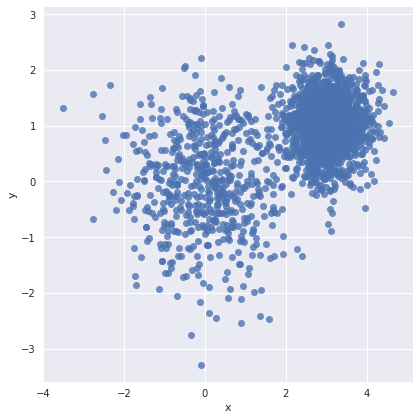

In [74]:
df = pd.DataFrame({"x":[x[0] for x in vectors_set],
                   "y":[x[1] for x in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

- log
  - page 77 jump to chapter 4